In [175]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.utils.vis_utils import plot_model

In [57]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [58]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [59]:
p = pd.read_csv('flights_small.csv')

In [60]:
p

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY
0,0,2015,1,1,4,NK,597,N528NK,MSP,FLL,...,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0,True
1,1,2015,1,1,4,NK,168,N629NK,PHX,ORD,...,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0,True
2,2,2015,1,1,4,B6,1030,N239JB,BQN,MCO,...,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0,True
3,3,2015,1,1,4,B6,2134,N307JB,SJU,MCO,...,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0,True
4,4,2015,1,1,4,B6,2276,N646JB,SJU,BDL,...,89.0,0,0,NaN,17.0,0.0,72.0,0.0,0.0,True
5,5,2015,1,1,4,AA,1057,N3ASAA,DFW,MIA,...,102.0,0,0,NaN,0.0,0.0,0.0,0.0,102.0,True
6,6,2015,1,1,4,US,425,N174US,PDX,PHX,...,60.0,0,0,NaN,0.0,0.0,60.0,0.0,0.0,True
7,7,2015,1,1,4,AA,89,N3KVAA,IAH,MIA,...,54.0,0,0,NaN,0.0,0.0,54.0,0.0,0.0,True
8,8,2015,1,1,4,AA,328,N4XKAA,DEN,DFW,...,66.0,0,0,NaN,13.0,0.0,53.0,0.0,0.0,True
9,9,2015,1,1,4,UA,1532,N77066,SFO,DEN,...,26.0,0,0,NaN,7.0,0.0,19.0,0.0,0.0,True


In [61]:
p.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY'],
      dtype='object')

In [65]:
air_sys_delay = p['TAXI_OUT']

In [66]:
mis_val_percent = 100 * air_sys_delay.isnull().sum() / len(p) 

In [67]:
mis_val_percent # Procenat NaN vrednosti za parametar AIR_SYSTEM_DELAY

0.0

In [ ]:
# Slicna situacija je i sa ostalim parametrima za delay jer uglavnom imaju vrednosti samo kad jeste kasnio let
# tako da se te vrednosti ne mogu koristiti za klasifikaciju
# Parametar CANCELLATION_REASON ima previse NaN vrednosti pa ni njega necemo koristiti

In [138]:
x = p[['YEAR','MONTH', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN']]

In [139]:
x

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,DISTANCE,WHEELS_ON,TAXI_IN
0,2015,1,1,4,12.0,14.0,141.0,220.0,1487,527.0,40.0
1,2015,1,1,4,72.0,9.0,246.0,175.0,1440,622.0,10.0
2,2015,1,1,4,-3.0,25.0,329.0,196.0,1129,509.0,11.0
3,2015,1,1,4,95.0,9.0,544.0,175.0,1189,727.0,3.0
4,2015,1,1,4,72.0,15.0,605.0,258.0,1666,902.0,6.0
5,2015,1,1,4,108.0,15.0,718.0,155.0,1121,1031.0,7.0
6,2015,1,1,4,60.0,13.0,633.0,150.0,1009,945.0,5.0
7,2015,1,1,4,58.0,19.0,637.0,137.0,964,928.0,7.0
8,2015,1,1,4,53.0,32.0,655.0,138.0,641,931.0,10.0
9,2015,1,1,4,19.0,15.0,605.0,153.0,967,912.0,11.0


In [140]:
y = p[['DELAY']]

In [141]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [142]:
x_train.shape

(77391, 11)

In [143]:
y_train.shape

(77391, 1)

In [144]:
number_of_features = x_train.shape[1]
output_size = 1

In [147]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [160]:
model = Sequential()

In [161]:
model.add(Dense(units= 50, input_dim = number_of_features, activation = 'relu'))

In [163]:
model.add(Dense(units=40, activation='relu'))

In [164]:
model.add(Dense(units = output_size, activation='sigmoid'))

In [165]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_20 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_21 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 41        
Total params: 9,781
Trainable params: 9,781
Non-trainable params: 0
_________________________________________________________________


In [177]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) -> instalirati pydot

In [167]:
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.3)

Train on 54173 samples, validate on 23218 samples
Epoch 1/30
54173/54173 [==============================] - 5s 94us/step - loss: 0.1916 - acc: 0.9172 - val_loss: 0.1600 - val_acc: 0.9319
Epoch 2/30
54173/54173 [==============================] - 5s 91us/step - loss: 0.1584 - acc: 0.9324 - val_loss: 0.1510 - val_acc: 0.9360
Epoch 3/30
54173/54173 [==============================] - 5s 89us/step - loss: 0.1546 - acc: 0.9327 - val_loss: 0.1514 - val_acc: 0.9339
Epoch 4/30
54173/54173 [==============================] - 5s 91us/step - loss: 0.1524 - acc: 0.9342 - val_loss: 0.1545 - val_acc: 0.9328
Epoch 5/30
54173/54173 [==============================] - 5s 91us/step - loss: 0.1509 - acc: 0.9341 - val_loss: 0.1522 - val_acc: 0.9349
Epoch 6/30
54173/54173 [==============================] - 5s 94us/step - loss: 0.1491 - acc: 0.9360 - val_loss: 0.1514 - val_acc: 0.9344
Epoch 7/30
54173/54173 [==============================] - 5s 95us/step - loss: 0.1484 - acc: 0.9367 - val_loss: 0.1452 - val_acc

In [168]:
epochs = history.epoch

In [169]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

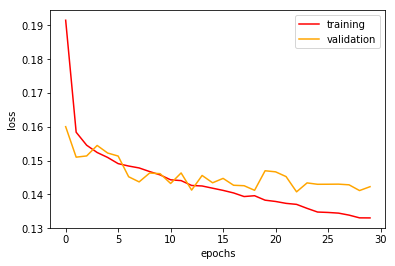

In [170]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [171]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

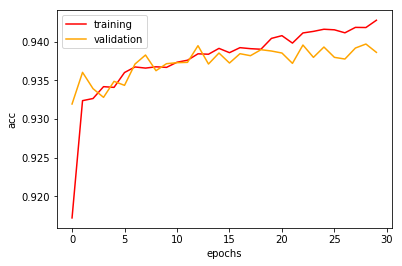

In [172]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [173]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

38119/38119 [==============================] - 1s 16us/step
Test loss: 0.14496076535718408, test accuracy: 0.9381673181353131
